## Imports

In [1]:
import sys
import os
import numpy as np
import numpy.lib.recfunctions as nprf
from sklearn import linear_model
import matplotlib as mpl


from importlib import reload
import pandas as pd

mpl.use('Agg')

mpl.rcParams['figure.figsize'] = (7,7)
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams.update({'font.size':22})

% matplotlib inline

import matplotlib.pyplot as plt

In [2]:
import tools.matt_tools as matt

reload(matt)

<module 'tools.matt_tools' from '/home/mho1/halo_cnn/notebooks/tools/matt_tools.py'>

In [3]:
wdir = '/home/mho1/scratch/halo_cnn'

# Load

In [14]:
data_file = os.path.join(wdir,
                         'data_query',
                         'MDPL2_Rockstar_snap:120_v2_reduced.csv')
dat_MD = pd.read_csv(data_file, index_col=0)
#                          'sfr_catalog_0.671200.npy')
#                         'MDPL2_Rockstar_z=0.117_Macc=1e11.csv')

/home/mho1/.conda/envs/jupy/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
data_file = os.path.join(wdir,
                         'data_raw',
                         'sfr_catalog_0.895100.npy')
dat_UM = np.load(data_file)
dat_UM = pd.DataFrame(dat_UM)


In [14]:

print(dat_MD.columns)
dat_MD.head(10)

Index(['row_id', 'rockstarId', 'upId', 'pId', 'descId', 'breadthFirstId',
       'M200b', 'Rvir', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'M500c', 'Rs', 'Macc',
       'Vacc', 'Mvir', 'M200c', 'scale'],
      dtype='object')


,row_id,rockstarId,upId,pId,descId,breadthFirstId,M200b,Rvir,x,y,...,vx,vy,vz,M500c,Rs,Macc,Vacc,Mvir,M200c,scale
0,1,11821536357,-1,-1,11972164248,5436700266,1.806500e+11,117.540,6.96556,9.51966,...,-474.57,-86.47,-185.71,1.189300e+11,7.774,1.701100e+11,102.52,1.701100e+11,1.460200e+11,0.8951
1,2,11821538117,-1,-1,11972166001,5409580057,1.746300e+11,117.540,3.61279,2.82443,...,-542.60,-142.91,-76.36,1.219400e+11,13.374,1.701100e+11,100.19,1.701100e+11,1.550600e+11,0.8951
2,3,11821536297,-1,-1,11972164190,6528947610,1.339800e+11,107.729,1.32607,1.75722,...,-652.79,-187.36,-54.90,6.774300e+10,18.702,1.309700e+11,82.89,1.309700e+11,1.174200e+11,0.8951
3,4,11821537517,-1,-1,11972165399,5939824855,1.354900e+11,106.897,2.13282,0.91453,...,-631.40,-151.32,-55.96,8.279800e+10,10.505,1.279600e+11,91.76,1.279600e+11,1.098900e+11,0.8951
4,5,11821542837,-1,-1,11972170721,6628740257,1.174200e+11,102.072,2.54390,1.23761,...,-403.86,-100.01,83.13,3.010800e+10,34.640,1.114000e+11,73.04,1.114000e+11,6.623800e+10,0.8951
5,6,11821539417,-1,-1,11972167296,6092917351,1.234400e+11,104.759,7.76026,5.01127,...,-435.18,-19.32,142.21,7.527100e+10,11.495,1.204300e+11,87.78,1.204300e+11,1.038700e+11,0.8951
6,7,11821534927,-1,-1,11972162822,4395842099,3.929100e+11,153.158,14.02830,6.33010,...,-369.72,-111.84,242.74,2.709700e+11,10.872,3.763500e+11,137.21,3.763500e+11,3.296800e+11,0.8951
7,8,11821530187,-1,-1,11972158142,2940537529,1.707100e+12,245.849,14.01580,6.11362,...,-365.37,-42.83,176.42,8.324900e+11,57.615,1.556600e+12,188.59,1.556600e+12,1.293100e+12,0.8951
8,9,11821542427,-1,-1,11972170310,6140205666,1.129100e+11,102.072,12.96110,4.51725,...,-375.45,-51.82,121.39,9.333500e+10,5.711,1.114000e+11,100.90,1.114000e+11,1.053800e+11,0.8951
9,10,11821535097,-1,-1,11972162991,4317037061,4.230200e+11,156.162,7.39442,10.80980,...,-435.26,-25.31,167.28,2.890400e+11,8.897,3.989300e+11,140.42,3.989300e+11,3.582900e+11,0.8951


In [15]:
dat_UM.head(10)

,x,y,z,vx,vy,vz,upid,id,mvir,mpeak,obs_sm,obs_sfr
0,3.405850,16.637180,91.849060,-208.309998,-186.809998,242.970001,-1,11821561109,1.726200e+14,1.728100e+14,1.194319e+12,1.024768
1,3.719573,16.531027,92.051743,-694.937622,-634.987976,-123.497276,11821561109,53000002900107172,8.393496e+09,2.890400e+11,2.896403e+10,2.837762
2,3.808963,17.124643,91.304192,-75.626617,-400.379150,554.288635,11821561109,41000004879831165,6.404367e+10,1.690600e+12,3.449705e+10,0.054612
3,3.390229,16.690458,91.908661,-655.760315,-340.822113,266.760132,11821561109,44000004360511635,9.074129e+09,2.092500e+11,2.575778e+10,0.082636
4,3.959978,16.360865,91.266914,-223.851639,-93.881302,522.229614,11821561109,36000005764327304,7.386536e+10,1.406100e+12,4.725956e+10,0.291601
5,3.700108,16.225718,91.832970,-658.988281,-31.404678,151.654938,11821561109,35000005942826643,3.324754e+10,2.980700e+11,2.395962e+10,0.068386
6,3.471246,16.180105,91.995720,-532.088745,-598.383484,284.099426,11821561109,25000007722938411,1.520150e+11,1.190800e+12,5.593840e+10,0.401510
7,2.977862,16.408745,91.987038,-236.450409,79.963394,924.542480,11821561109,68000001048741782,5.085003e+09,6.623800e+10,3.207689e+09,0.003328
8,3.137563,16.505594,91.956978,-196.435181,-270.985626,-21.743271,11821561109,54000002750398512,1.033524e+11,2.089500e+12,3.278440e+10,2.158500
9,4.140018,16.731819,92.002434,-575.110413,-390.126129,293.410706,11821561109,48000003689609840,7.068176e+09,1.911900e+11,6.648070e+09,0.002949


# Show Clusters

In [6]:
hosts_MD = dat_MD[(dat_MD['pId']==-1) & 
                  (np.log10(dat_MD['M200c'])>14)
                 ]

/home/mho1/.conda/envs/jupy/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


host: 11824560713.0
# kids: 64


kids_out: 33
non_in: 1


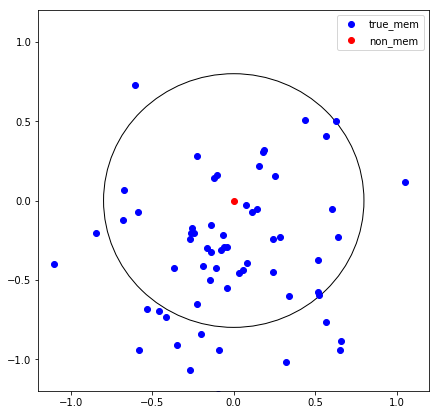

In [8]:
# Get host info
host_MD = hosts_MD.sample().iloc[0]
print('host: ' + str(host_MD['rockstarId']))

host_UM = dat_UM[host_MD['rockstarId']==dat_UM['id']].iloc[0]

radius = host_MD['Rs']/1000.

# Get kid info
kids = dat_UM[dat_UM['upid']==host_UM['id']]
print('# kids: ' + str(len(kids)))

kid_pos = kids[['x','y','z']] - host_UM[['x','y','z']]

# Get non-members
non_mem = dat_UM[
    (dat_UM['upid']==-1) &
    (dat_UM['x'] > (host_UM['x'] - 1.5*radius)) & 
    (dat_UM['x'] < (host_UM['x'] + 1.5*radius))&
    (dat_UM['y'] > (host_UM['y'] - 1.5*radius)) & 
    (dat_UM['y'] < (host_UM['y'] + 1.5*radius))&
    (dat_UM['z'] > (host_UM['z'] - 1.5*radius)) & 
    (dat_UM['z'] < (host_UM['z'] + 1.5*radius))
]
non_mem_pos = non_mem[['x','y','z']] - host_UM[['x','y','z']]


# Plot
f = plt.figure(figsize=[7,7])
ax = f.add_subplot(111)

circle = plt.Circle((0, 0), radius = radius, edgecolor='k', facecolor='none')
ax.add_artist(circle)
ax.plot(kid_pos['x'],kid_pos['y'],'o',c='b',label='true_mem')
ax.plot(non_mem_pos['x'],non_mem_pos['y'],'o',c='r',label='non_mem')

ax.set_xlim(-1.5*radius, 1.5*radius)
ax.set_ylim(-1.5*radius, 1.5*radius)
ax.legend()

# Stats
kids_out = np.sum((kid_pos['x']**2 + kid_pos['y']**2 + kid_pos['z']**2) > radius**2)
non_in = np.sum((non_mem_pos['x']**2 + non_mem_pos['y']**2 + non_mem_pos['z']**2) < radius**2)
print('\n')
print('kids_out: ' +str(kids_out))
print('non_in: ' + str(non_in))

In [65]:
dat_UM.iloc[1]['x']

3.7195727825164795

# Cosmology

In [35]:
import scipy.integrate as integrate
import scipy.interpolate as interpolate

import time

In [10]:
cosmo = {'H_0': 100, # [km/s/(Mpc/h)]
         'Omega_m': 0.307115,
         'Omega_l': 0.692885,
         'c': 299792.458 # [km/s]
         }

Text(0,0.5,'H')

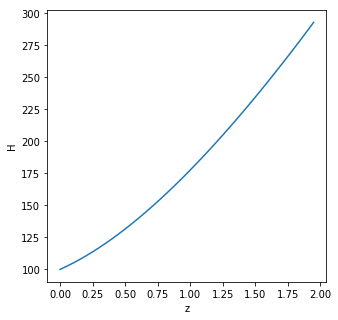

In [52]:
def H_from_z(z, cosmo):
    H = cosmo['H_0'] * (cosmo['Omega_m']*(1 + z)**3 + cosmo['Omega_l'])**0.5
    return H

samp = np.arange(0,2,0.05)

f = plt.figure(figsize=(5,5))
plt.plot(samp,H_from_z(samp, cosmo))
plt.xlabel('z')
plt.ylabel('H')

normal: 0.003621339797973633
interp: 0.0068511962890625
numpy: 9.822845458984375e-05


Text(0,0.5,'H')

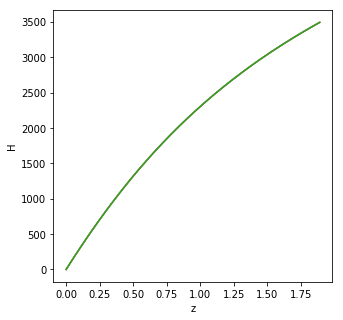

In [54]:
def d_from_z(z, cosmo):
    d = integrate.quad(lambda x: cosmo['c']/H_from_z(x, cosmo), 0, z)
    return d[0]

samp = np.arange(0,2,0.01)
test_samp = np.arange(0.00005,1.9,0.01)

t0 = time.time()
d_norm = [d_from_z(i, cosmo) for i in test_samp]
print('normal: ' + str(time.time()-t0))

d = [d_from_z(i, cosmo) for i in samp]
d_from_z_interp = interpolate.interp1d(samp, d)

t0 = time.time()
d_interp = [d_from_z_interp(i) for i in test_samp]
print('interp: ' + str(time.time()-t0))

def d_from_z_nump(z):
    d_nump = np.interp(z, samp, d)
    return d_nump

t0 = time.time()
d_nump = d_from_z_nump(test_samp)
print('numpy: ' + str(time.time()-t0))

f = plt.figure(figsize=(5,5))



plt.plot(test_samp, d_norm)
plt.plot(test_samp, d_interp)
plt.plot(test_samp, d_nump)
plt.xlabel('z')
plt.ylabel('H')

## Numpy interpolator is a factor of 10 faster than other methods

In [55]:
dat_UM.columns

Index(['x', 'y', 'z', 'vx', 'vy', 'vz', 'upid', 'id', 'mvir', 'mpeak',
       'obs_sm', 'obs_sfr'],
      dtype='object')

# KD Tree

In [6]:
from scipy.spatial import KDTree

In [7]:
kids = dat_UM[dat_UM['upid']!=-1]
hosts = dat_UM[dat_UM['upid']==-1]

In [12]:
tree = KDTree([[0,0,1],[0,0,1]], leafsize=50)

In [13]:
y = tree.query_ball_point(hosts[['x','y']].head(10),100)

ValueError: Searching for a 2-dimensional point in a 3-dimensional KDTree

In [11]:
len(y[0])

871

In [57]:
hosts.index.to_series()

0                  0
17                17
25                25
29                29
35                35
39                39
42                42
44                44
47                47
54                54
56                56
59                59
62                62
67                67
69                69
75                75
83                83
86                86
88                88
93                93
95                95
99                99
100              100
103              103
106              106
109              109
114              114
118              118
122              122
124              124
              ...   
24486883    24486883
24486884    24486884
24486885    24486885
24486891    24486891
24486897    24486897
24486900    24486900
24486903    24486903
24486907    24486907
24486908    24486908
24486915    24486915
24486925    24486925
24486926    24486926
24486934    24486934
24486943    24486943
24486948    24486948
24486950    24486950
24486960    2

In [83]:
in_ball=0
for i,row in kids[['x','y']].head(100000).iterrows():
    if ((row['x']-500)**2 + (row['y']-500)**2 < 500**2):
        in_ball +=1
print(in_ball)

467


In [35]:
w = kids['x'].head(40)+kids['y'].head(40)
w.loc[[3,16,7,60]]

/home/mho1/.conda/envs/jupy/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


3     20.080687
16    19.707470
7     19.386606
60          NaN
dtype: float32

In [83]:
[x in [40,45] for x in dat_UM.iloc[40:50].index.to_series()]

[True, False, False, False, False, True, False, False, False, False]

# Rotations

In [5]:

th = np.pi*np.random.random()

m1 = np.array([[np.cos(th),-np.sin(th)],[np.sin(th),np.cos(th)]])
m2 = 4*np.array([[1],[0]])

np.matmul(m1,m2)

array([[-3.44027599],
       [ 2.04071093]])

In [23]:
dat_MD.head(5)[['x','y','z']]

,x,y,z
0,-11.717397,1.728489,11.301684
1,-9.712948,-5.744850,9.490162
2,-9.956891,-7.501455,7.641367
3,-10.747159,-9.488186,9.523682
4,-19.275559,-17.587923,15.850690


In [34]:
th_x, th_y, th_z = 2*np.pi*np.random.random(3)

# th_x = np.pi

R_x = np.array([[1,0,0],
                [0, np.cos(th_x), -np.sin(th_x)], 
                [0, np.sin(th_x), np.cos(th_x)]]
              )

R_y = np.array([[np.cos(th_y), 0, np.sin(th_y)],
                [0, 1, 0],
                [-np.sin(th_y), 0, np.cos(th_y)]]
              )

R_z = np.array([[np.cos(th_z), -np.sin(th_z), 0],
                [np.sin(th_z), np.cos(th_z), 0],
                [0,0,1]]
              )
R = np.matmul(R_z, R_y, R_x)



dat_MD.loc[0:5,['x','y','z']] = np.matmul(dat_MD.loc[0:5,['x','y','z']].values, R.T)

In [46]:
pd.DataFrame(, columns=['x','y','z'])

,x,y,z
0,11.352279,-0.516439,11.784404
1,4.002012,-2.626083,13.946162
2,1.687031,-1.641814,14.431229
3,1.483578,-3.112528,16.862348
4,1.526903,-4.851591,30.104107
5,17.480813,14.432387,14.916863


In [48]:
import time

t0 = time.time()
gal_pos = np.matmul(dat_MD[['x','y','z']], R.T)
t1 = time.time()
gal_pos = pd.DataFrame(gal_pos, columns=['x','y','z'])
t2 = time.time()

print(t1-t0)
print(t2-t1)

0.16823577880859375
0.0007598400115966797


# Load/Save catalog

In [ ]:
import pickle

In [26]:
class Cluster:
    
    def __init__(self, prop=None, gal=None):
        self.prop = prop
        self.gal = gal

class Catalog:
    def __getitem__(self, key):
        return Cluster(prop = self.prop.iloc[key],
                       gal = self.gal[key])
    def __len__(self):
        return len(self.prop)
    
    def __init__(self, prop=None, gal=None):
        self.prop = prop # Properties of host clusters. (# clusters) x (# of properties)
        self.gal = gal # Cluster members. Position, velocities, etc.
    
    def save(self,filename):
        with open(filename, 'wb') as out_file:
            pickle.dump(self, out_file)
    def load(self, filename):
        with open(filename, 'rb') as in_file:
            new_cat = pickle.load(in_file)
        
        self.prop = new_cat.prop
        self.gal = new_cat.gal

In [27]:
c = Catalog(prop = pd.DataFrame(np.random.rand(100,len(dat_MD.columns)),
                                columns=dat_MD.columns
                               ),
            gal = [np.random.rand(5,np.random.randint(15)) for i in range(100)]
           )

In [28]:
file_name = os.path.join(wdir,'data_raw','catalog','temp.p')

c.save(file_name)

In [29]:
c.prop.head()

,row_id,rockstarId,upId,pId,descId,breadthFirstId,M200b,Rvir,x,y,...,vx,vy,vz,M500c,Rs,Macc,Vacc,Mvir,M200c,scale
0,0.081327,0.827463,0.517041,0.783035,0.242950,0.005151,0.059740,0.510258,0.447961,0.118091,...,0.518459,0.759606,0.773318,0.556385,0.712711,0.875113,0.881270,0.528273,0.040974,0.143970
1,0.371553,0.666226,0.103578,0.192403,0.043131,0.962065,0.397233,0.868677,0.789545,0.865311,...,0.490728,0.959442,0.832670,0.384788,0.983948,0.705448,0.443895,0.311246,0.440022,0.109309
2,0.422287,0.866850,0.272102,0.665185,0.691286,0.224001,0.305792,0.992446,0.491964,0.140620,...,0.949099,0.396328,0.157017,0.027252,0.099027,0.541977,0.105500,0.260430,0.105840,0.760412
3,0.386519,0.220909,0.206619,0.632416,0.754664,0.658839,0.369257,0.142260,0.706999,0.946186,...,0.935309,0.489431,0.841294,0.662617,0.496387,0.122466,0.911771,0.441999,0.681289,0.557740
4,0.473522,0.177748,0.145955,0.624807,0.447260,0.704414,0.644913,0.272200,0.472394,0.747422,...,0.811833,0.002548,0.214302,0.707073,0.077141,0.731867,0.814034,0.936873,0.194387,0.969809


In [30]:
c = Catalog()
c.load(file_name)

In [33]:
c.gal

[array([[0.46430587, 0.4716896 ],
        [0.12582955, 0.15573872],
        [0.93246209, 0.90815433],
        [0.52215271, 0.10213539],
        [0.66252004, 0.90061969]]),
 array([[0.41557278, 0.8173551 , 0.06905902, 0.11268233, 0.71857878,
         0.73231955, 0.99180401, 0.79878689, 0.54294509, 0.49273659,
         0.53542201, 0.7700309 ],
        [0.86077947, 0.86817212, 0.09083004, 0.98759154, 0.82950877,
         0.82474322, 0.91063983, 0.66444724, 0.71418192, 0.40586528,
         0.98706837, 0.04112764],
        [0.0303127 , 0.47878925, 0.79800297, 0.17411533, 0.1350514 ,
         0.19228943, 0.58539521, 0.91978918, 0.71443392, 0.28963039,
         0.63082044, 0.28927007],
        [0.11950601, 0.09098574, 0.98676758, 0.025804  , 0.21746572,
         0.04974628, 0.20674756, 0.74912753, 0.68862535, 0.24840318,
         0.52530351, 0.37581537],
        [0.62074571, 0.57516691, 0.76128065, 0.63485085, 0.57237388,
         0.69240922, 0.17357863, 0.26924819, 0.05595954, 0.23905739,
  

In [18]:
p = pd.DataFrame.from_csv(os.path.join(wdir,'data_raw','catalog','Rockstar_UM_z=0.117_pure_prop.csv'))
g = np.load(os.path.join(wdir,'data_raw','catalog','Rockstar_UM_z=0.117_pure_gal.npy'))

/home/mho1/.conda/envs/jupy/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [22]:
c = Catalog(prop=p,
            gal=g
           )

In [24]:
with open(os.path.join(wdir,'data_raw','catalog','Rockstar_UM_z=0.117_pure.p'),'wb') as out_file:
    pickle.dump(c,out_file)

# Scratch

In [6]:
pillar_ind = np.random.randint(0,len(dat_MD),1000)
true_memb = np.random.randint(0,len(dat_MD),1000)

In [7]:
[i for i in true_memb if i not in pillar_ind]

[1174822,
 3356131,
 2711668,
 3063547,
 2153460,
 3222173,
 1982275,
 4382662,
 4506260,
 4076137,
 4009190,
 4549183,
 1550693,
 2881937,
 3611584,
 2152235,
 4656914,
 4470798,
 1537537,
 3067805,
 1647420,
 4437902,
 463962,
 3587966,
 1601902,
 178464,
 3489712,
 116973,
 3090421,
 2652872,
 2415620,
 3600306,
 285281,
 2131797,
 2737875,
 1535599,
 915602,
 1843887,
 1582929,
 3090644,
 3064791,
 4073488,
 1529063,
 4160669,
 4172923,
 1136944,
 1545193,
 3718321,
 1533147,
 1332051,
 380006,
 3797227,
 3963668,
 4710185,
 1972558,
 477288,
 4070649,
 2872063,
 2171457,
 3958614,
 3053258,
 3036784,
 1643930,
 1027403,
 1619625,
 4705177,
 799847,
 705299,
 832188,
 3589129,
 2453836,
 1766714,
 1296545,
 2204928,
 1445158,
 1596037,
 3044156,
 2329224,
 1018905,
 3600404,
 1931167,
 3088284,
 3357687,
 4148467,
 2837434,
 121113,
 1325677,
 4236989,
 428074,
 4480217,
 2800696,
 1813092,
 4190276,
 2324345,
 2391928,
 931442,
 2711633,
 1398775,
 2662503,
 2864582,
 1890270,
 40

In [67]:


x = 'd'*(10**9)
t0 = time.time()
y = [None]*100
y[3] = x
t1 = time.time()
y = [None]*100
y.append(x)
t2 = time.time()
print(t1-t0)
print(t2-t0)

0.10101199150085449
0.10110712051391602


In [76]:
dat_MD.head().iloc[:,-2]

0    1.460200e+11
1    1.550600e+11
2    1.174200e+11
3    1.098900e+11
4    6.623800e+10
Name: M200c, dtype: float64

In [62]:
gal_dtype = [ ('x_proj','<f4'),
              ('y_proj','<f4'),
              ('v_los', '<f4'),
              ('true_memb','<i4')
            ]
clu_gals = np.zeros(shape=(10),
                    dtype=gal_dtype)

clu_gals['true_memb'][[0,4]]=True

In [71]:
pad_regions = []
pad_directions = (None, False, True)

for i in pad_directions:
    for j in pad_directions:
        for k in pad_directions:
            pad_regions.append((i,j,k))

            
pad_regions

[(None, None, None),
 (None, None, False),
 (None, None, True),
 (None, False, None),
 (None, False, False),
 (None, False, True),
 (None, True, None),
 (None, True, False),
 (None, True, True),
 (False, None, None),
 (False, None, False),
 (False, None, True),
 (False, False, None),
 (False, False, False),
 (False, False, True),
 (False, True, None),
 (False, True, False),
 (False, True, True),
 (True, None, None),
 (True, None, False),
 (True, None, True),
 (True, False, None),
 (True, False, False),
 (True, False, True),
 (True, True, None),
 (True, True, False),
 (True, True, True)]

In [38]:
pad_gal_data = pd.DataFrame(np.zeros(shape=(100, dat_UM.shape[1])), 
                            columns = dat_UM.columns)

pad_gal_data.values[0:5,:] = dat_UM.iloc[5:10].values
# print(pad_gal_data.head(10))
# print(dat_UM.head(5))
pad_gal_data

,x,y,z,vx,vy,vz,upid,id,mvir,mpeak,obs_sm,obs_sfr
0,3.700108,16.225718,91.832970,-658.988281,-31.404678,151.654938,1.182156e+10,3.500001e+16,3.324754e+10,2.980700e+11,2.395962e+10,0.068386
1,3.471246,16.180105,91.995720,-532.088745,-598.383484,284.099426,1.182156e+10,2.500001e+16,1.520150e+11,1.190800e+12,5.593840e+10,0.401510
2,2.977862,16.408745,91.987038,-236.450409,79.963394,924.542480,1.182156e+10,6.800000e+16,5.085003e+09,6.623800e+10,3.207689e+09,0.003328
3,3.137563,16.505594,91.956978,-196.435181,-270.985626,-21.743271,1.182156e+10,5.400000e+16,1.033524e+11,2.089500e+12,3.278440e+10,2.158500
4,4.140018,16.731819,92.002434,-575.110413,-390.126129,293.410706,1.182156e+10,4.800000e+16,7.068176e+09,1.911900e+11,6.648070e+09,0.002949
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


In [13]:
dat_MD.iloc[1].index

Index(['row_id', 'rockstarId', 'upId', 'pId', 'descId', 'breadthFirstId',
       'M200b', 'Rvir', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'M500c', 'Rs', 'Macc',
       'Vacc', 'Mvir', 'M200c', 'scale'],
      dtype='object')

In [95]:
dat_UM.shape
x = pd.DataFrame(np.zeros(shape=(13,dat_UM.shape[1])), columns = dat_UM.columns)
x.iloc[0] = dat_UM.iloc[0]
y = x

y.append(x)

,x,y,z,vx,vy,vz,upid,id,mvir,mpeak,obs_sm,obs_sfr
0,3.40585,16.63718,91.84906,-208.309998,-186.809998,242.970001,-1.0,1.182156e+10,1.726200e+14,1.728100e+14,1.194319e+12,1.024768
1,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
3,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
4,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
5,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
6,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
7,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
8,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
9,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


In [9]:
dat_MD.sort_values(by=['rockstarId'], axis=0).head(10)

,Unnamed: 0.1,row_id,rockstarId,upId,pId,descId,breadthFirstId,M200b,Rvir,x,...,vx,vy,vz,M500c,Rs,Macc,Vacc,Mvir,M200c,scale
42,42,43,11821523287,-1,-1,11972151404,4185086937,4.501200e+11,158.102,29.15900,...,83.77,6.57,-414.23,3.025900e+11,9.002,4.139900e+11,141.36,4.139900e+11,3.733400e+11,0.8951
654386,654386,654387,11821523288,11830111836,11830111836,11972151405,6773350480,1.083900e+11,100.673,30.06720,...,-563.00,94.89,-88.72,9.935700e+10,5.067,1.580700e+11,100.13,1.068800e+11,1.038700e+11,0.8951
2617569,2617569,2617570,11821523289,-1,-1,11972151406,4867230843,2.529100e+11,130.317,48.48210,...,63.33,-129.05,-229.49,1.595700e+11,8.713,2.318300e+11,119.68,2.318300e+11,2.017200e+11,0.8951
1968660,1968660,1968661,11821523292,-1,-1,11972151409,6140198119,1.174200e+11,102.983,68.11470,...,-47.25,-81.84,50.30,7.677600e+10,13.392,1.144100e+11,83.36,1.144100e+11,9.634600e+10,0.8951
981872,981872,981873,11821523295,11821523412,11821523412,11972151412,5784653325,1.866700e+11,120.582,4.20388,...,-671.59,-8.93,-852.89,1.475300e+11,6.506,2.363500e+11,139.60,1.836600e+11,1.776400e+11,0.8951
1309030,1309030,1309031,11821523303,-1,-1,11972151420,4728946489,2.800100e+11,135.990,5.14392,...,-358.24,-313.09,-588.38,2.032300e+11,5.436,2.634500e+11,132.80,2.634500e+11,2.423700e+11,0.8951
327499,327499,327500,11821523316,11821523412,11821523412,11972151432,6003314357,1.731200e+11,115.422,4.57579,...,-157.18,328.03,-635.48,1.098900e+11,20.552,2.920500e+11,162.09,1.610800e+11,1.400000e+11,0.8951
2617839,2617839,2617840,11821523319,11821523412,11821523412,11972151435,7868188715,7.376500e+10,88.966,4.64085,...,-506.75,-273.80,-47.78,6.774300e+10,2.542,1.400000e+11,128.92,7.376500e+10,7.226000e+10,0.8951
2617841,2617841,2617842,11821523329,-1,-1,11972151445,6140198187,1.249500e+11,103.878,4.85800,...,-541.07,613.90,-713.66,9.484100e+10,5.488,1.174200e+11,104.33,1.174200e+11,1.098900e+11,0.8951
1309031,1309031,1309032,11821523333,11821523334,11821523334,11972151449,7020026982,9.183000e+10,94.648,4.94306,...,-102.89,380.13,-883.46,5.118400e+10,5.687,1.836600e+11,94.70,8.881900e+10,7.677600e+10,0.8951


In [2]:
from collections import OrderedDict

In [4]:
par = OrderedDict()

In [17]:
par1 = OrderedDict([
    ('wdir', '/home/mho1/scratch/halo_cnn/')
])
par2 = OrderedDict([
    ('model_name', 'halo_cnn1d_r')
])

In [13]:
for key in par.keys():
    print(key + ' : ' + str(par[key]))

wdir : /home/mho1/scratch/halo_cnn/
model_name : halo_cnn1d_r


In [18]:
par1.update(par2)

In [23]:
par1

OrderedDict([('wdir', '/home/mho1/scratch/halo_cnn/'),
             ('model_name', 'halo_cnn1d_r')])

In [4]:
from bs4 import BeautifulSoup

In [6]:
xml = '''<uws:job xmlns:uws="http://www.ivoa.net/xml/UWS/v1.0" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.1">
  <uws:jobId>1528838918683310284</uws:jobId>
  <uws:runId xsi:nil="true"/>
  <uws:ownerId>maho3</uws:ownerId>
  <uws:phase>PENDING</uws:phase>
  <uws:quote xsi:nil="true"/>
  <uws:creationTime>2018-06-12T23:28:38+02:00</uws:creationTime>
  <uws:startTime xsi:nil="true"/>
  <uws:endTime xsi:nil="true"/>
  <uws:executionDuration>0</uws:executionDuration>
  <uws:destruction xsi:nil="true"/>
  <uws:parameters/>
  <uws:results/>
</uws:job>
'''

In [11]:
soup = BeautifulSoup(xml,'xml')

In [15]:
soup.find('uws:jobId').getText()

'1528838918683310284'

In [40]:
host_drop = ['row_id','upId','pId','descId','breadthFirstId','scale']

dat_MD.head()[[i for i in dat_MD.columns.values if i not in host_drop]]

,rockstarId,M200b,Rvir,x,y,z,vx,vy,vz,M500c,Rs,Macc,Vacc,Mvir,M200c
0,11821536357,1.806500e+11,117.540,13.806758,-8.653011,-1.584917,-474.57,-86.47,-185.71,1.189300e+11,7.774,1.701100e+11,102.52,1.701100e+11,1.460200e+11
1,11821538117,1.746300e+11,117.540,13.727866,-1.552345,-5.152065,-542.60,-142.91,-76.36,1.219400e+11,13.374,1.701100e+11,100.19,1.701100e+11,1.550600e+11
2,11821536297,1.339800e+11,107.729,12.737955,-0.326572,-7.172156,-652.79,-187.36,-54.90,6.774300e+10,18.702,1.309700e+11,82.89,1.309700e+11,1.174200e+11
3,11821537517,1.354900e+11,106.897,15.285599,0.735671,-7.876349,-631.40,-151.32,-55.96,8.279800e+10,10.505,1.279600e+11,91.76,1.279600e+11,1.098900e+11
4,11821542837,1.174200e+11,102.072,26.513309,1.767421,-15.034870,-403.86,-100.01,83.13,3.010800e+10,34.640,1.114000e+11,73.04,1.114000e+11,6.623800e+10


In [4]:
dir_name = os.path.join(wdir,'data_query','subsets')
f1 = os.path.join(dir_name,'MDPL2_Rockstar_snap:120_x:[0,250]_1529097112172024553.csv')
f2 = os.path.join(dir_name,'MDPL2_Rockstar_snap:120_x:[250,500]_1529097114379758456.csv')
dat = pd.read_csv(f1)
print(len(dat))
dat=dat.append(pd.read_csv(f2))
print(len(dat))

9475580
18988741


In [7]:
d = {'M':[12,4,5], 'vlos':[np.array([12,34,5]),np.array([235,7])]}
print(d)
df = pd.DataFrame(data=d)

{'M': [12, 4, 5], 'vlos': [array([12, 34,  5]), array([235,   7])]}


ValueError: arrays must all be same length

In [10]:
d = dict( A = np.array([1,2]), B = np.array([1,2,3,4]) )
df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))


In [4]:
x = 'm.csv'
print(x[-4:])

.csv
